# Frameworks: Inception (основы)


## ML/DL frameworks

### Keras
[Framework documentation](https://keras.io/)

`Keras` — это довольно высокоуровневый фреймворк, для описания нейросетевых моделей. Его основное назначение — быстрое прототипирование. Фактически он не реализует низкоуровневую логику, а оборачивает `core framework`, например `Tensorflow` или  `Theano`. 

### Pytorch
`Pytorch` является фреймворком с динамически исполняемыми графами.
* [Main page](https://pytorch.org/)
* [Documentation](https://pytorch.org/docs/stable/)
* [Introductory habr post](https://habr.com/ru/post/334380/)


### Tensorflow

Tensorflow в первой версии является библиотекой, в которой графы являются статическими, вычисления производятся в сессиях. Основное преимущество - тонкая настройка в production среде, поэтому все примеры в этом курсе сделаны на tensorflow.

# Обзор инструментов ML-разработчика

### Pandas
Это очень удобный фреймворк для беглого анализа данных в случае, если датасет не превосходит 100МБ. Для больших датасетов производительности этого инструмента уже может не хватать, если речь заходит о гигабайтах и сотнях гигабайт, нужно использовать специализированные решения вроде **Hadoop Spark**

Скачаем для примера, какой-нибудь простой датасет в формате Comma Separated Values (CSV). Это довольно типичный формат для текстового хранения таблиц.

In [0]:
!curl -L https://datahub.io/machine-learning/iris/r/iris.csv --output iris.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0     84      0  0:00:01  0:00:01 --:--:--    84
100  4753  100  4753    0     0   2741      0  0:00:01  0:00:01 --:--:--  2741


In [0]:
!head iris.csv

sepallength,sepalwidth,petallength,petalwidth,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


Библиотека Pandas предоставляет удобный функционал для работы с таблицами. По сути работа с таблицей превращается практически в работу над таблицей базы данных. 

In [0]:
import pandas as pd
'''
Иногда вместо ',' в качестве разделителя выступает '\t'
Тогда файл читается через: data = pd.read_csv('iris.csv', sep='\t')
Функция read_csv предоставляет еще много разного функционала,
например можно переименовать столбцы, или оставить их без имян.
Можно задавать словари для преобразования значений на лету, 
взять только нужные столбцы, автоматом заменять значения из 
заданного списка на true или false и много чего еще
'''
def name_to_class_id(name):
  if name == 'Iris-setosa':
    return 0
  if name == 'Iris-versicolor':
    return 1
  if name == 'Iris-virginica':
    return 2
pd_data = pd.read_csv('iris.csv', converters={'class': name_to_class_id})
pd_data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

**Проведем небольшую демонстрацию того, что из себя представляет Pandas DataFrame:**

In [0]:
# Из таблицы можно взять столбец или набор столбцов аналогично обычному select
selected_columns = pd_data[['sepallength','sepalwidth','class']]
selected_columns.head()

,sepallength,sepalwidth,class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [0]:
# Объявим 2 датафрэйма для демонстрации табличных операций на примере join
df = pd.DataFrame({
     'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K5'],
     'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A5']
})
other = pd.DataFrame({
    'key': ['K0', 'K1', 'K2'],
    'B': ['B0', 'B1', 'B2']
})
print(df.head())
print('---------')
print(other.head())

  key   A
0  K0  A0
1  K1  A1
2  K2  A2
3  K3  A3
4  K4  A4
---------
  key   B
0  K0  B0
1  K1  B1
2  K2  B2


In [0]:
# Сделаем join получившихся таблиц по индексу
print(df.join(other, lsuffix='_caller', rsuffix='_other'))

  key_caller   A key_other    B
0         K0  A0        K0   B0
1         K1  A1        K1   B1
2         K2  A2        K2   B2
3         K3  A3       NaN  NaN
4         K4  A4       NaN  NaN
5         K5  A5       NaN  NaN


In [0]:
# Сделаем join получившихся таблиц по заданному ключу
# В этом примере мы поменяли индекс у обеих таблиц, но
# можно этого не делать если использовать ON
print(df.set_index('key').join(other.set_index('key')))

      A    B
key         
K0   A0   B0
K1   A1   B1
K2   A2   B2
K3   A3  NaN
K4   A4  NaN
K5   A5  NaN


In [0]:
# В этом примере мы сохраняем индекс первой таблицы
joined_df = df.join(other.set_index('key'), on='key') 
print(joined_df)

  key   A    B
0  K0  A0   B0
1  K1  A1   B1
2  K2  A2   B2
3  K3  A3  NaN
4  K4  A4  NaN
5  K5  A5  NaN


In [0]:
# К самим датафреймам также можно применять преобразования/фильтры и др.
# Например можно легко выбросить строки с NaN в столбце
print(joined_df[joined_df['B'].notnull()])

  key   A   B
0  K0  A0  B0
1  K1  A1  B1
2  K2  A2  B2


В целом, pandas позволяет делать и аналог subquery, строить цепочки запросов и реализует очень много функционала реляционных баз данных. Кроме того, поверх такого представления данных легко строить разные графики или экспортировать эти датафреймы в разные форматы.

[Хорошая статья](https://tproger.ru/translations/rewrite-sql-queries-in-pandas/) на tproger с примерами того, как можно использовать **pandas** вместо **SQL** 

Все же часто бывает удобно подготовить данные в **pandas** но сложные статистики считать непосредственно внутри **Numpy**

### Numpy
Это библиотека для быстрых тензорных операций в Python
Здесь есть быстрое перемножение тензоров, поиск корней уравнения, производные на решетке, матричные разложения и вообще до кучи разного функционала из линейной алгебры. Для примера, решим задачу Iris с использованием **Numpy** 

In [0]:
import numpy as np
np_data, np_target = pd_data.values[:, :-1], pd_data.values[:, -1].astype(int)
print(np_data.shape, np_data[0])
print(np_target.shape, np_target[0])

(150, 4) [5.1 3.5 1.4 0.2]
(150,) 0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


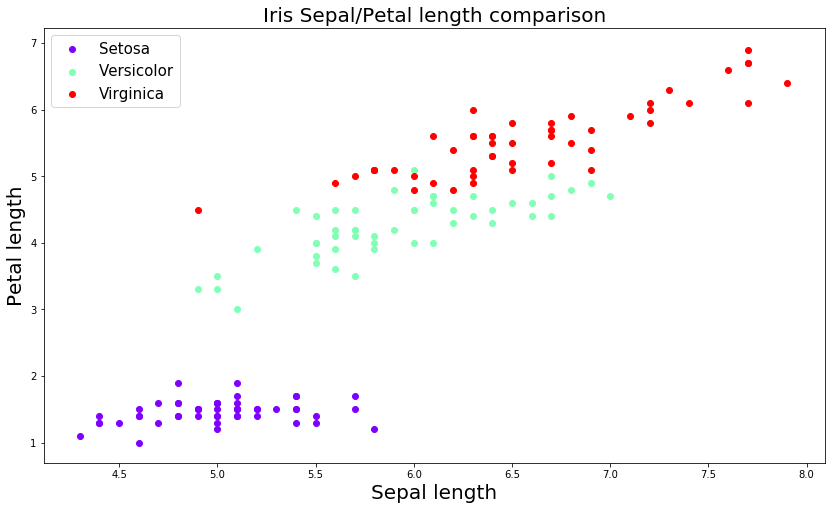

In [0]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
# Воспользуемся Matplotlib чтобы визуализировать зависимости между параметрами
setosa = np_data[np_target == 0]
versicolor = np_data[np_target == 1]
virginica = np_data[np_target == 2]
colors = cm.rainbow(np.linspace(0, 1, 3))
plt.figure(figsize=(14, 8))
plt.scatter(setosa[:, 0], setosa[:, 2], c=colors[0], label='Setosa')
plt.scatter(versicolor[:, 0], versicolor[:, 2], c=colors[1], label='Versicolor')
plt.scatter(virginica[:, 0], virginica[:, 2], c=colors[2], label='Virginica')
plt.title('Iris Sepal/Petal length comparison', fontsize=20)
plt.xlabel('Sepal length', fontsize=20)
plt.ylabel('Petal length', fontsize=20)
plt.legend(fontsize=15)

Здесь я специально обратил внимание на пару параметров, по которым
выборка данных практически линейно разделима. Построим алгоритм классификации
по следующему принципу: если значение PetalLength < 2.5, то мы относим ирис
к классу Setosa. В противном случае мы вычисляем: 
sign(w1 * petallength + w2 * sepallength), нужно только сопоставить метки классов, например {-1: versicolor, 1: virginica} и сформулировать задачу регрессии. Найдем w1 и w2 как решение СЛАУ по методу наименьших квадратов.

In [0]:
# Выделим только интересующие нас признаки
A = np.vstack([versicolor[:, ::2], virginica[:, ::2]])
# Проставим метки класса для versicolor и virginica как -1 и 1
b = np.hstack([-np.ones(len(versicolor)), np.ones(len(virginica))])
# Решим задачу регрессии при помощи Numpy
params = np.linalg.lstsq(A, b)[0]

# Сделаем предсказание по принципу, описанному выше
result = np.zeros(len(np_data))
y_pred = np.sign(np_data[:, ::2].dot(params))
y_pred[np_data[:, 2] < 2.5] = -3
y_pred = (y_pred + 3) / 2
# Посчитаем Accuracy для нашего метода.
print(np.sum(y_pred == np_target) / len(y_pred))


0.9333333333333333


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


Здесь я продемонстрировал только маленькую толику функционала библиотеки Numpy. Конечно там есть не только least squares, но и поиск корней уравнения, матричные разложения и прочее. 

### Scikit-learn: demo

Для того, чтобы протестировать различные классические модели на небольшом датасете можно воспользоваться пакетом scikit-learn. Чтобы было понятно, чем же он так удобен, проведем небольшую демонстрацию

In [0]:
# Это может путать, но пакет импортируется именно как sklearn (а не scikit_learn)
import sklearn

In [0]:
'''Самые тривиальные и классические датасеты в sklearn можно подключать прямо
из коробки, например Iris или Digits, хотя понятное дело, что ими 
все не ограничивается
'''
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
# Например загрузим iris

In [0]:
'''Загруженный датасет нужно как-то разделить на обучающую и тестовую подвыборки
в sklearn есть удобная функция с большим количеством настроек: train_test_split
'''
from sklearn.model_selection import train_test_split

In [0]:
'''  В библиотеке реализованы все основные метрики качеста для классификации
и регрессии. Если вдруг нужна сильно специфичная метрика, ее придется
реализовать вручную. Как их использовать, покажу на примере accuracy
'''
from sklearn.metrics import accuracy_score

In [0]:
''' Как может выглядеть типичный код на sklearn для классификации
Посмотрим на примере функции, sklearn_deo(data_loader, classifier)
data_loader:
  Функция, из sklearn.datasets, загружающая один из датасетов
classsifier:
  Любой классифицирующий "estimator" из sklearn
'''
def sklearn_demo(data_loader, classifier):
  #   Загрузим датасет в память X и y - это numpy массивы
  X, y = data_loader(return_X_y=True)
  
  '''Разделим выборку на обучающую и тестовую части
  test_size=0.2 - означает, что размер тестовой выборки составит 20% от общего
  размера датасета. А random_state=42 нужно для фиксирования какого-нибудь
  одного разбиения на подмножества. Благодаря нему мы получаем воспроизводимость
  разделения датасета, соответственно и результатов эксперимента, это важно.
  '''
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  
  '''Максимально просто в Sklearn можно обучить модель и предсказать значения
  для тестовой выборки. Финально выведем статистику по тому, какой accuracy_score
  (то есть доля верных ответов) достигает наша модель на данных.
  '''
  classifier.fit(x_train, y_train)
  y_pred = classifier.predict(x_test)
  print('Used classifier: {}, Got accuracy score: {}'.format(type(classifier), accuracy_score(y_test, y_pred)))

In [0]:
'''Посмотрим чуть более детально на примере Iris
'''
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
print('MSE distance between data: {}'.format(np.square(X - np_data).sum()))
print('MSE distance between targets: {}'.format(np.square(y - np_target).sum()))
'''Видно, что датасет почти ничем не отличается от того, что мы разбирали раньше.
Загрузим и протестируем несколько стандартных классификаторов, которые нам
доступны в sklearn.

By the way, после этого комментария не просто так стоит символ ";", как вы
думаете зачем?
''';

MSE distance between data: 0.27
MSE distance between targets: 0


In [0]:
'''Возьмем для примера LogisticRegression и KNeighborsClassifier
(кстати будте внимательны к написанию слова neighbor, а то можно жестоко обмануться)
'''
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [0]:
sklearn_demo(load_iris, LogisticRegression())
'''Мы видим здесь FutureWarnings про то, как поменяются значения по умолчанию,
давайте их зададим явно, чтобы было меньше мусора в выводе
''';

Used classifier: <class 'sklearn.linear_model.logistic.LogisticRegression'>, Got accuracy score: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
sklearn_demo(load_iris, LogisticRegression(
    solver='lbfgs', 
    multi_class='auto',
))
'''Теперь мы увидели, что метод не успел нормально сойтись к решению. 
Хотя мы и видим accuracy_score: 1.0. Давайте увеличим max_iter до 300
''';

Used classifier: <class 'sklearn.linear_model.logistic.LogisticRegression'>, Got accuracy score: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
sklearn_demo(load_iris, LogisticRegression(
    solver='lbfgs', 
    multi_class='auto',
    max_iter=300
))
# Итак, мы получили обученную модель с неплохим результатом на тесте

Used classifier: <class 'sklearn.linear_model.logistic.LogisticRegression'>, Got accuracy score: 1.0


In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier as RFC
'''Аналогично можно продемонстрировать все это для KNN или RandomForest, 
whatever you want
'''
sklearn_demo(load_iris, LogisticRegression(
    solver='lbfgs', 
    multi_class='auto',
    max_iter=300
))
sklearn_demo(load_iris, LDA())

sklearn_demo(load_iris, KNeighborsClassifier())

sklearn_demo(load_iris, RFC(
    n_estimators=10
))

Used classifier: <class 'sklearn.linear_model.logistic.LogisticRegression'>, Got accuracy score: 1.0
Used classifier: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, Got accuracy score: 1.0
Used classifier: <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, Got accuracy score: 1.0
Used classifier: <class 'sklearn.ensemble.forest.RandomForestClassifier'>, Got accuracy score: 1.0


In [0]:
'''Продемонстрируем все то же самое на чуть более сложной задаче, например
digits
'''
sklearn_demo(load_digits, LDA())

sklearn_demo(load_digits, KNeighborsClassifier())

sklearn_demo(load_digits, RFC(
    n_estimators=10
))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Used classifier: <class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, Got accuracy score: 0.9444444444444444
Used classifier: <class 'sklearn.neighbors.classification.KNeighborsClassifier'>, Got accuracy score: 0.9861111111111112
Used classifier: <class 'sklearn.ensemble.forest.RandomForestClassifier'>, Got accuracy score: 0.9527777777777777


Другая важная сторона — это подбор гиперпараметров
В Sklearn есть возможность из коробки запустить некоторый
перебор гиперпараметров, покажем это на примере GridSearch. Сейчас не вдаваясь в подробности сделаем некоторый перебор параметров для RandomForestClassifier на задаче digits

In [0]:
# Подключим некоторый PrettyPrint, чтобы красиво выводить словари
from pprint import pprint
# Подключим рандомизированный поиск по сетке параметров
from sklearn.model_selection import RandomizedSearchCV
# Количество деревьев в RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Алгоритм выбора максимального количества фичей на каждом разделении
max_features = ['auto', 'sqrt']
# Максимальная глубина дерева
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Минимальное количество элементов при котором вершина все еще делится
min_samples_split = [2, 5, 10]
# Минимальное количество элементов в терминальной вершине
min_samples_leaf = [1, 2, 4]
# Использовать ли bootstrap aggregation
bootstrap = [True, False]
# Соберем из этого решетку для перебора
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [0]:
rf = RFC()
rf_random = RandomizedSearchCV(
    estimator = rf, 
    param_distributions = random_grid, 
    n_iter = 10, 
    cv = 3, 
    verbose=2, 
    random_state=42, 
    n_jobs = -1
)
# Обучим модель случайного поиска
X, y = load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   53.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
# Как мы видим, наш поиск гиперпараметров позволил найти более подходящее решение
sklearn_demo(load_digits, RFC())
sklearn_demo(load_digits, rf_random.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Used classifier: <class 'sklearn.ensemble.forest.RandomForestClassifier'>, Got accuracy score: 0.9583333333333334
Used classifier: <class 'sklearn.ensemble.forest.RandomForestClassifier'>, Got accuracy score: 0.975


### Tensorflow: demo

Главная особенность фреймворка Tensorflow заключается в построении и компиляции графа вычислений над тензорами, заданием входных вершин ( placeholder), а фреймворк позволяет вычислять значения в вершинах графа, а также распространять градиенты в обратном порядке (backpropagation)

Научимся создавать графы вычислений: каждая из вершин графа имеет один из трех видов:

1. placeholder, в который можно передавать различные значения тензоров
2. Тензор, который задается некоторым методом инициализации
3. Тензор, являющийся результатом некоторой операции

Построим граф, который представляет собой схему для вычисления `3x + y`

In [0]:
import tensorflow as tf

In [0]:
x = tf.placeholder(tf.float32, shape=())
y = tf.placeholder(tf.float32, shape=())

Параметр shape задает количество размерностей тензора и размер по каждой координате. Если количество элементов в какой-то из размерностей может быть произвольным, то для этой размерности указывается значение `None`.

***Вопрос.*** Почему в этом случае `shape=()`? 

Рассмотрим различные способы того, как можно задавать тензоры на примере 3.

In [0]:
three_1 = tf.constant(3.0)
z1 = three_1 * x + y

In [0]:
three_2 = tf.get_variable('three', shape=(), initializer=tf.constant_initializer(3.0))
z2 = three_2 * x + y

In [0]:
z3 = x * 3 + y

Теперь, как в схеме, нужно подать ток! Для этого необходимо создать сессию. Это можно сделать разными способами:

In [0]:
# Способ 1. Для произвольных Python файлов

with tf.Session() as sess:
    print(sess.run(z1, feed_dict={
        x: 2,
        y: 5
    }))

    print(sess.run(z3, feed_dict={
        x: 2,
        y: 5
    }))

11.0
11.0


Попробуем запустить для `z2`.

In [0]:
with tf.Session() as sess:

    print(sess.run(z2, feed_dict={
        x: 2,
        y: 5
    }))

FailedPreconditionError: ignored

Как вы думаете, почему не работает?

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(z2, feed_dict={
        x: 2,
        y: 5
    }))

11.0


Параметр feed_dict в запуске сессии указывает на то, какие данные мы подставляем в placeholder для подсчета итоговых значений.

Вторым способом, удобным для использования в ноутбуках, является использование интерактивных сессий:

In [0]:
interactive_sess = tf.InteractiveSession()

In [0]:
interactive_sess.run(z1, feed_dict={x: 2, y: 5})

11.0

Для структурирования тензоров и операций в tensorflow, есть понятия области видимости имен и переменных - ***name_scope*** и ***variable_scope*** соответственно. Особенно полезно это оказывается тогда, когда необходимо продублировать граф с одними переменными.

Рассмотрим для этого пример вычисления уровня на плоскости: $v * (w + a) + b$, где $v$ и $w$ - некоторые веса, а $a$, $b$ - входные данные. 

In [0]:
tf.get_variable?

In [0]:
v1 = tf.get_variable('v1', shape=())
w1 = tf.get_variable('w1', shape=())

a = tf.placeholder(tf.float32, shape=())
b = tf.placeholder(tf.float32, shape=())

W0906 13:27:26.465807 140669548255104 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
res = v1 * (w1 + a) + b

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(res, feed_dict={a: 1.0, b: 2.0}))

2.6891224


А теперь мы хотим только произвести умножение на $v$ c тем значением $v$, которое уже задано. Для этого нужно создавать новый placeholder, повторять вычисления? Нет!

In [0]:
v2 = tf.get_variable('v1', shape=())

ValueError: ignored

Из сообщения ошибки понимаем, что нужно создать переменную с тем же именем, только через опцию `reuse=True`. Внутри variable_scope можно такое сделать:

In [0]:
with tf.variable_scope('double-mul'):
    v1 = tf.get_variable('v1', shape=())
    w1 = tf.get_variable('w1', shape=())

    a = tf.placeholder(tf.float32, shape=())
    b = tf.placeholder(tf.float32, shape=())
    
    res1 = v1 * (w1 + a) + b

In [0]:
v1

<tf.Variable 'double-mul/v1:0' shape=() dtype=float32_ref>

In [0]:
# Делаем последнее действие
with tf.variable_scope('double-mul'):
    v2 = tf.get_variable('v1', shape=())

    c = tf.placeholder(tf.float32, shape=())
    d = tf.placeholder(tf.float32, shape=())

ValueError: ignored

In [0]:
# Делаем последнее действие
with tf.variable_scope('double-mul', reuse=True):
    v2 = tf.get_variable('v1', shape=())

    c = tf.placeholder(tf.float32, shape=())
    d = tf.placeholder(tf.float32, shape=())
    
    res2 = v2 * c + d

In [0]:
v2

<tf.Variable 'double-mul/v1:0' shape=() dtype=float32_ref>

Проверяем, действительно ли это та же переменная, что и в начале

In [0]:
# Проверяем, 
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print('v1', sess.run(v1))
    print('v2', sess.run(v2))
    
    print('vc + d', sess.run(res2, feed_dict={c: 1, d: 0}))
    print('v(w + a) + b', sess.run(res1, feed_dict={a: 0, b: 0}))

v1 -0.4822961
v2 -0.4822961
vc + d -0.4822961
v(w + a) + b -0.18991287


Зачастую этот кейс пригождается в тех случаях, когда обучаем сеть последовательно: сначала один блок на классификацию, после чего - на дополнительную задачу (сначала идет общее, после чего уже идет разбиение на подзадачи)

#### Обучим линейный классификатор на распознавание iris

In [0]:
np_data.shape

(150, 4)

In [0]:
from keras.utils import to_categorical

np_categorical = to_categorical(np_target)

Using TensorFlow backend.


In [0]:
with tf.variable_scope('iris', reuse=tf.AUTO_REUSE):
    
    iris_input = tf.placeholder(tf.float32, shape=[None, 4], name='input')
    iris_labels = tf.placeholder(tf.float32, shape=[None, 3], name='labels')

    iris_weights = tf.get_variable('weights', shape=(4, 3))
    
    iris_product = tf.matmul(iris_input, iris_weights)
    
    iris_bias = tf.get_variable('bias', shape=(3))
    
    
    iris_logits = iris_product + iris_bias
    
    
    iris_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        labels=iris_labels,
        logits=iris_logits
    ))

W0906 13:32:51.022709 140669548255104 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Зададим оптимизатор

iris_optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(
    iris_loss, var_list=tf.trainable_variables(scope='iris')
)


In [0]:
interactive_sess.run(tf.global_variables_initializer())

In [0]:
# Проверим, что loss считается
interactive_sess.run(iris_loss, feed_dict={
    iris_input: np_data,
    iris_labels: np_categorical
})

2.2896354

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(
    np_data, np_categorical,
    shuffle=True,
    random_state=42
)

In [0]:
# Цикл обучения

for epoch in range(50):
    train_loss, _ = interactive_sess.run(
        [iris_loss, iris_optimizer], feed_dict={
            iris_input: X_train,
            iris_labels: y_train
        }
    )
    
    val_loss = interactive_sess.run(
        iris_loss, feed_dict={
            iris_input: X_val,
            iris_labels: y_val
        }
    )
    
    print(f'Epoch {epoch + 1}: train {train_loss}, val {val_loss}')

Epoch 1: train 2.3284037113189697, val 1.7589867115020752
Epoch 2: train 1.8861340284347534, val 1.389502763748169
Epoch 3: train 1.4865851402282715, val 1.0515822172164917
Epoch 4: train 1.1170687675476074, val 0.7791897058486938
Epoch 5: train 0.8158633708953857, val 0.6362537145614624
Epoch 6: train 0.6527039408683777, val 0.5950297117233276
Epoch 7: train 0.6014522910118103, val 0.5821021199226379
Epoch 8: train 0.5842180848121643, val 0.5746920108795166
Epoch 9: train 0.5749747157096863, val 0.5684366226196289
Epoch 10: train 0.568074643611908, val 0.5624251365661621
Epoch 11: train 0.5620465874671936, val 0.5564801692962646
Epoch 12: train 0.556433379650116, val 0.5505938529968262
Epoch 13: train 0.5510746836662292, val 0.5447918176651001
Epoch 14: train 0.545908510684967, val 0.5390993356704712
Epoch 15: train 0.5409080386161804, val 0.5335345268249512
Epoch 16: train 0.5360598564147949, val 0.5281082987785339
Epoch 17: train 0.5313558578491211, val 0.5228262543678284
Epoch 18: 

In [0]:
# Как выдать значения

with tf.variable_scope('iris', reuse=tf.AUTO_REUSE):
    iris_predictions = tf.argmax(iris_logits, axis=1)

val_target = interactive_sess.run(iris_predictions, feed_dict={
    iris_input: X_val
})

In [0]:
np.sum(val_target == np.argmax(y_val, axis=1)) / len(val_target)

0.8157894736842105

Таким образом, обучение в Tensorflow заключается в следующем:
* созданием графов вычислением
* определением операции (функции потерь), по которой происходит оптимизация
* в каждом шаге обучения производим вычисление функции оптимизации (градиентов), замеряем метрики на train
* в каждом шаге валидации производим вычисление метрик и смотрим на получившиеся результаты

Анаконда - это довольно тяжелый и многофункциональный набор пакетов под python, включающий в себя numpy, pandas, matplotlib, sklearn, jupyter и др. Простой способ заиметь сразу большинство нужных для машинки пакетов и пару седых волос. Впрочем, без них вряд ли обходится любой жизненный путь. Здесь нужно отметить наличие такого удобного инструмента разработки как Jupyter Notebook. Это web инструмент для удобного интерактива с интерпретатором Python. 

### OpenCV
OpenCV — это библиотека компьютерного зрения, в которой есть множество инструментов для решения простых задач, и в целом для обработки изображений. Разберем основные принципы фреймворка

In [0]:
import cv2
cv2.__version__

'3.4.3'

In [0]:
# Скачаем какое-нибудь изображение для демонстрации, например lena.jpg
!curl https://pbs.twimg.com/media/D_dwZaOXUAMkM-q.png:large -o lena.jpg
lena = cv2.imread("lena.jpg")
''' Давайте убедимся в том, что на самом деле cv2 работает с картинками
как с Numpy массивами.'''
print(type(lena), lena.shape)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1073k  100 1073k    0     0   197k      0  0:00:05  0:00:05 --:--:--  256k
<class 'numpy.ndarray'> (800, 800, 3)


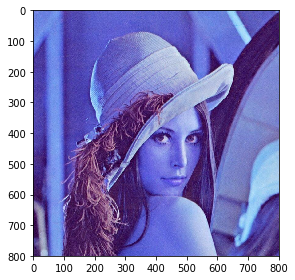

In [0]:
''' Есть некоторое количество проблем с тем, чтобы отрисовывать картинки
при помощи нативной функции cv2.imshow(image), поэтому для демонстрации
воспользуемся функцией из библиотеки scikit-image
'''
from skimage.io import imshow
imshow(lena)

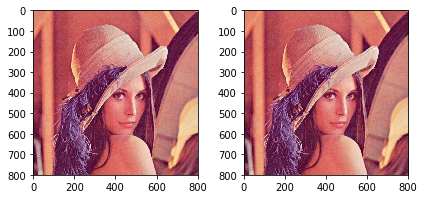

In [0]:
import matplotlib.pyplot as plt
'''И тут мы замечаем интересную особенность:
по умолчанию все картинки в OpenCV хранятся в формате BGR, а не RGB
Это как правило не накладывает никаких ограничений, кроме того
вы в любой момент можете вернуться к привычному ходу вещей с помощью
функции cv2.cvtColor(image, cv2.COLOR_BGR2RGB), другой понятный способ
состоит в том, чтобы взять срез по цветам в обратном порядке image[:, :, ::-1]
'''
plt.subplot('121')
imshow(cv2.cvtColor(lena, cv2.COLOR_BGR2RGB))
plt.subplot('122')
imshow(lena[:, :, ::-1])
'''Как мы видим, оба подхода эквивалентны, для картинок со слоем 
прозрачности есть свои нюансы, но об этом поговорим позже''';

In [0]:
'''Кроме работы с отдельными изображениями, opencv позволяет обрабатывать
видеопотоки. Для примера скачаем какой-нибудь видеофайл и превратим его в 
поток'''

'Кроме работы с отдельными изображениями, opencv позволяет обрабатывать\nвидеопотоки. Для примера скачаем какой-нибудь видеофайл и превратим его в \nпоток'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10013  100 10013    0     0   6977      0  0:00:01  0:00:01 --:--:--  6977


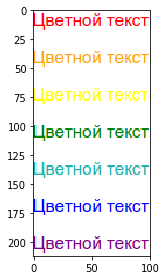

In [0]:
'''Бинаризация изображения, одна из очень важных задач обработки изображений.
Это легко увидеть при работе с текстами. Когда мы работаем с текстами,
нам не так важен цвет текста как его форма, размер и др. В том числе, 
распознавать черно-белый текст проще, чем смесь цветных'''
!curl https://nsu.ru/usermanual/_images/642.png -o colored_text.jpg
colored_text = cv2.imread('colored_text.jpg')
imshow(colored_text[:, :, ::-1])

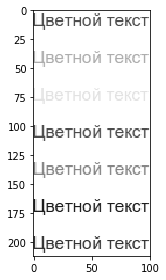

In [0]:
gray_text = cv2.cvtColor(colored_text, cv2.COLOR_BGR2GRAY)
imshow(gray_text)

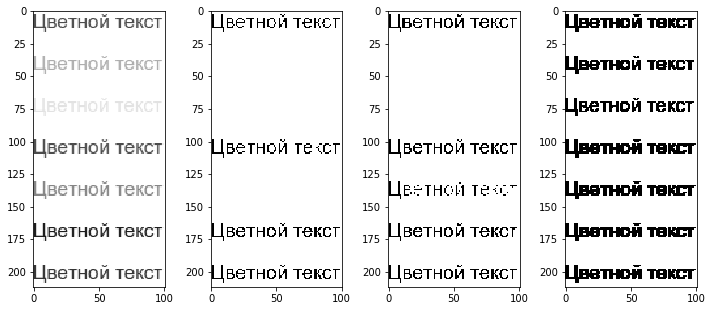

In [0]:
ret, thresholded1 = cv2.threshold(gray_text, 127, 255, cv2.THRESH_BINARY)
ret, thresholded2 = cv2.threshold(gray_text, 150, 255, cv2.THRESH_BINARY)
ret, thresholded3 = cv2.threshold(gray_text, 250, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 6))
plt.subplot('141')
imshow(gray_text)
plt.subplot('142')
imshow(thresholded1)
plt.subplot('143')
imshow(thresholded2)
plt.subplot('144')
imshow(thresholded3)
'''Вот наглядная демонстрация того, что бинаризация по порогу может работать
не слишком хорошо даже в довольно простых ситуациях, а главный вопрос
скорее даже в том, как этот порог можно подбирать?''';

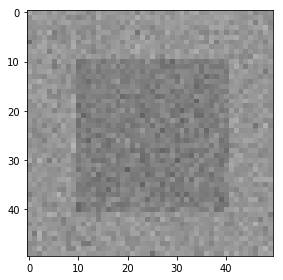

In [0]:
'''Сгенерируем шумную картинку для демонстрации. Заодно покажем, наличие 
встроенного функционала, который позволяет рисовать простые фигуры, например 
прямоугольник. Для фигур также можно задавать тип и толщину линии. Если указать
толщину линии -1: рисование будет производиться с заливкой.

Главное помнить, что в OpenCV любые отрисовки и перерисовки осуществляются
in place, если вы не хотите изменять старое изображение, вам нужно предварительно
скопировать его на новый "холст"

Еще хочется обратить внимание на то, что по умолчанию, мы работаем с массивами
типа np.uint8, то есть в каждом цветовом канале значение пикселя может быть
равно целому числу из диапазона [0..255]
'''
noisy_gray = 150 * np.ones((50, 50), dtype=np.uint8)
cv2.rectangle(noisy_gray, (10, 10), (40, 40), 127, thickness=-1)
noisy_gray = (noisy_gray + np.random.normal(0, 10, size=2500).reshape(50, 50)).astype(np.uint8)
# Заодно покажу как сохранять изображения
cv2.imwrite('noisy.jpg', noisy_gray)
imshow(noisy_gray)

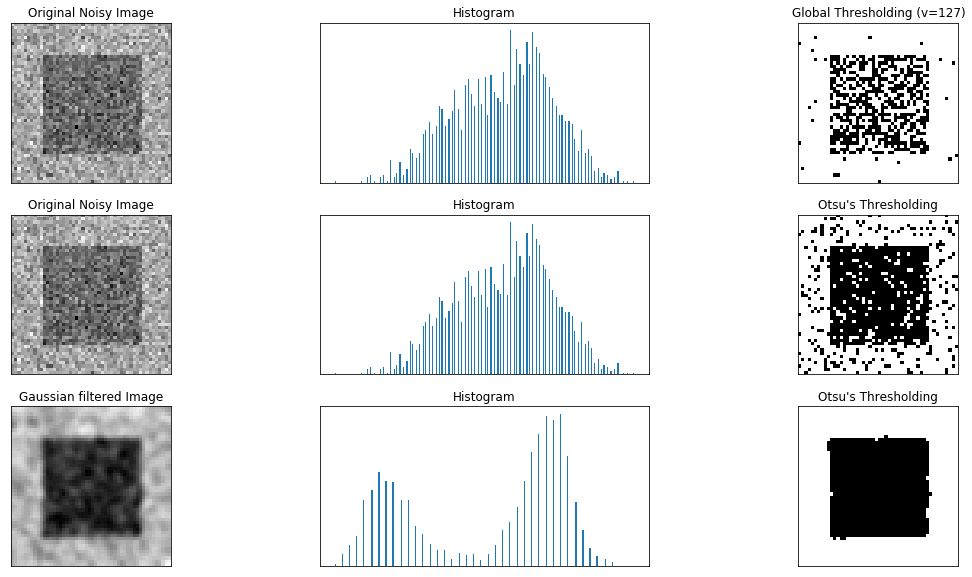

In [0]:
'''OpenCV умеет считывать изображения сразу как серые, для этого нужно передать
соответствующий флаг. Важно запомнить, что если не передавать флаг, одноканальные
изображения будут загружены как цветные. Вы получите массив с 3 одинаковыми
каналами по цветам и ошибки при работе с функциями, которые рассчитывают на
одноканальные изображения, так что будте внимательны.

Ниже я написал некоторую демонстрацию возможностей openCV по применению
фильтров, а также метода Отцу. Этот метод относится к методам с глобальным
порогом, но он определяет этот порог алгоритмически исходя из распределения
интенсивностей на изображении.
'''
img=cv2.imread('noisy.jpg', cv2.IMREAD_GRAYSCALE)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize=(20, 10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### Jupyter
Jupyter — это современный подход к интерактивному программированию на питоне. Почему интерактивное? Потому что ваш "juptyer" постоянно подключен к ядру интерпретатора. Давайте посмотрим на примере:



In [0]:
import json
import base64
# Посчитаем сумму некоторых параметров в json файле
source = 'CnsKICAibmFtZSI6ICJteSB0ZXN0IGpzb24iLAogICJwYXJhbXMiOiBbMC44LCAwLjMsIDIuNSwgMS43XQoKfQo='
parsed_json = json.loads(base64.b64decode(source))
# Выведем результат загрузки json данных
print(parsed_json)

{'name': 'my test json', 'params': [0.8, 0.3, 2.5, 1.7]}


In [0]:
# Ядро хранит в памяти данные с прошлых запусков
# Вычислим сумму параметров
sum(parsed_json['params'])

5.3

#### Notebooks
Это мощный инструмент для быстрого написания и отладки простых скриптов, дебага, интерактивной работы с базами данных для анализа и много чего еще
#### Jupyter Lab
Работа в Jupyter ноутбуках часто заканичивается тем, что у вас открыт миллион вкладок и это может быть не слишком удобно. Jupyter lab позволяет удобно управлять всеми вкладками jupyter и не теряться.![А то будете как Даша](https://cs6.pikabu.ru/post_img/big/2015/01/12/5/1421043416_1912902171.jpg)
#### Google colaboratory
Это онлайн сервис от гугла, который вам практически на халяву дает примерно следующее:
* Совместный просмотр, комментирование, редактирование ноутбуков
* Удобную подгрузку файлов с гугл диска
* Возможность подключить веб к вашему ядру
* Экспорт и импорт стандартного формата .ipynb
* Nvidia Tesla K80
* В окружении установлены библиотеки для машинного обучения

![](https://cs4.pikabu.ru/images/big_size_comm/2014-03_6/13959524073096.jpg)

Важно помнить, что долгие вычисления в colab могут быть не самой лучшей идеей.
* При разрыве интернет соединения процессы могут прерваться
* Есть ограничение от разработчиков, каждые 12 часов ноутбук сбрасывает ядро.
* Малое количество ядер процессора - доступно 2 (лайфхак - можно переполнить память, дадут машину с 4 ядрами)
![](https://image.spreadshirtmedia.com/image-server/v1/compositions/1012773656/views/1,width=650,height=650,appearanceId=1,backgroundColor=d6daf0,version=1565757568/classic-sad-frog.jpg)

### Anaconda
Анаконда — это программный пакет для "исследователей". Это удобная обертка для Python/R с библиотеками для машинного обучения из коробки. Удобно:
* Большинство библиотек будет установлено автоматически
* Много разных оберток

Неудобно:
* Вам может быть не нужно столько библиотек, а анаконда довольно много весит
* Могут быть конфликты с системным питоном или между анакондами под разные версии питона



### PyCharm.
Преимущества работы в IDE:
* Auto-complete
* Refactor (generate code/rename)
* Add remote repository
* Visual merge/rebase...
* Syntax check
* Code style
* Scientific mode

Клевые штуки в PyCharm Professional Edition

* Remote deployment
* Remote interpreter
* Remote debugger


## Упражнения

1. Обучите двуслойную сеть на классификацию на датасете digits (для промежуточного слоя активации используйте `tf.nn.relu`), замерьте точность на классификации.

2. Обучите двуслойную сеть на классификацию на датасете MNIST. Для загрузки можно использовать `from keras.datasets import mnist`, пример - https://keras.io/datasets/#mnist-database-of-handwritten-digits, замерьте точность на классификации


## Update operations in Tensorflow

Иногда необходимо создавать операции обновления некоторых параметров в самом графе. К примеру, таким образом можно создавать подсчеты для средних метрик (accuracy, f1score, precision). Некоторые техники, как batch normalization работают с накапливаемой статистикой

К примеру, напишем пример для подсчета среднего значения функции.

In [0]:
import tensorflow as tf

In [0]:
sess = tf.InteractiveSession()

In [0]:
values = tf.placeholder(tf.float32, shape=[None])

In [0]:
count = tf.get_variable('count1', dtype=tf.int32, shape=(), initializer=tf.constant_initializer(0))

In [0]:
batch_count = tf.shape(values)[0]

In [0]:
sum_values = tf.get_variable('sum_values', dtype=tf.float32, shape=(), initializer=tf.constant_initializer(0))

In [0]:
count_increment = tf.assign_add(count, batch_count)

In [0]:
sum_increment = tf.assign_add(sum_values, tf.reduce_sum(values))

In [0]:
sess.run(tf.global_variables_initializer())

In [20]:
import numpy as np
sess.run(sum_increment, feed_dict={values: np.ones(10).astype(np.float32)})

10.0

In [21]:
sess.run(sum_values)

10.0

In [22]:
sess.run(sum_increment, feed_dict={values: np.ones(20).astype(np.float32)})

30.0

Таким образом, можно использовать накапливание счетчиков. Теперь осталось сделать два пункта:
* Как посчитать среднее значение?
* Как обнулить значение счетчика?

In [0]:
# Среднее значение

mean_value = sum_values / tf.cast(count, tf.float32)

In [27]:
sess.run(mean_value)

inf

Однако, среднее значение не менялось. В чем проблема?

In [0]:
with tf.control_dependencies([count_increment]):
    sum_increment_v2 = tf.assign_add(sum_values, tf.reduce_sum(values))

In [30]:
# Проверка
sess.run(tf.global_variables_initializer())
sess.run(sum_increment_v2, feed_dict={values: np.ones(20).astype(np.float32)})
print(sess.run(mean_value))

1.0


In [0]:
# Обнуление счетчика

reset_sum_op = tf.assign(sum_values, 0.0)
reset_count_op = tf.assign(count, 0)

In [32]:
sess.run([reset_sum_op, reset_count_op])

[0.0, 0]

In [33]:
sess.run([count, sum_values])

[0, 0.0]

## Упражнения на обновления

* Для примера с MNIST реализуйте подсчет метрики accuracy
* Реализуйте метод градиентного спуска при помощи операции обновления. Вам может помочь функция `tf.gradients`: (https://www.tensorflow.org/api_docs/python/tf/gradients)

## Tensorboard

Tensorboard - очень удобный метод визуализации различных данных при обучении в tensorflow. Поддерживает следующие типы переменных:
* scalar - для функций потерь
* изображения
* граф вычислений, построенный в сессии
* гистограммы распределений

### Инструкция по запуске в Colab

In [34]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2019-09-13 11:33:02--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.196.238.26, 3.224.23.57, 52.86.119.192, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.196.238.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13607069 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  12.98M  17.2MB/s    in 0.8s    

2019-09-13 11:33:08 (17.2 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13607069/13607069]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [37]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://221efc2c.ngrok.io


In [46]:

tf.reset_default_graph()
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
with tf.variable_scope('iris-with-summaries', reuse=tf.AUTO_REUSE):
    
    iris_input = tf.placeholder(tf.float32, shape=[None, 4], name='input')
    iris_labels = tf.placeholder(tf.float32, shape=[None, 3], name='labels')

    iris_weights = tf.get_variable('weights', shape=(4, 3))
    
    iris_product = tf.matmul(iris_input, iris_weights)
    
    iris_bias = tf.get_variable('bias', shape=(3))
    
    
    iris_logits = iris_product + iris_bias
    
    
    iris_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
        labels=iris_labels,
        logits=iris_logits
    ))

    
iris_optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(
    iris_loss, var_list=tf.trainable_variables(scope='iris-with-summaries')
)

In [39]:
import pandas as pd

!curl -L https://datahub.io/machine-learning/iris/r/iris.csv --output iris.csv


def name_to_class_id(name):
  if name == 'Iris-setosa':
    return 0
  if name == 'Iris-versicolor':
    return 1
  if name == 'Iris-virginica':
    return 2
pd_data = pd.read_csv('iris.csv', converters={'class': name_to_class_id})
pd_data.head()

import numpy as np
np_data, np_target = pd_data.values[:, :-1], pd_data.values[:, -1].astype(int)

from keras.utils import to_categorical

np_categorical = to_categorical(np_target)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   131  100   131    0     0    126      0  0:00:01  0:00:01 --:--:--   126
100  4753  100  4753    0     0   3742      0  0:00:01  0:00:01 --:--:--  3742


Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    np_data, np_categorical,
    shuffle=True,
    random_state=42
)

In [0]:
train_loss_summary = tf.summary.scalar('train_loss', iris_loss)

In [0]:
merged = tf.summary.merge_all()

In [0]:
train_writer = tf.summary.FileWriter('logs/train', sess.graph) # Указываем папку для сохранения данных

In [52]:
sess.run(tf.global_variables_initializer())


# Цикл обучения

for epoch in range(50):
    train_loss, _, summary = sess.run(
        [iris_loss, iris_optimizer, merged], feed_dict={ # прогоняем подсчет summary
            iris_input: X_train,
            iris_labels: y_train
        }
    )
    
    train_writer.add_summary(summary, epoch) # Добавляем summary
    train_writer.flush() # Скидываем данные на диск
    
    val_loss = sess.run(
        iris_loss, feed_dict={
            iris_input: X_val,
            iris_labels: y_val
        }
    )
    
    print(f'Epoch {epoch + 1}: train {train_loss}, val {val_loss}')

Epoch 1: train 1.4760088920593262, val 1.2687275409698486
Epoch 2: train 1.2883274555206299, val 1.111716866493225
Epoch 3: train 1.1344021558761597, val 0.9773215651512146
Epoch 4: train 1.0016803741455078, val 0.8587863445281982
Epoch 5: train 0.8832842707633972, val 0.7552294731140137
Epoch 6: train 0.7785571813583374, val 0.6697545051574707
Epoch 7: train 0.6910381317138672, val 0.6069896221160889
Epoch 8: train 0.6259600520133972, val 0.5683593153953552
Epoch 9: train 0.5854058265686035, val 0.5483033657073975
Epoch 10: train 0.5642406344413757, val 0.5380032062530518
Epoch 11: train 0.5536396503448486, val 0.5314278602600098
Epoch 12: train 0.5472992658615112, val 0.526068925857544
Epoch 13: train 0.5424424409866333, val 0.5211482048034668
Epoch 14: train 0.5381237268447876, val 0.5164585113525391
Epoch 15: train 0.5340515375137329, val 0.5119455456733704
Epoch 16: train 0.5301353931427002, val 0.5075905919075012
Epoch 17: train 0.526343822479248, val 0.5033820867538452
Epoch 18:

# Упражнения

Для датасета MNIST:
* сделайте выводы картинок MNIST в tensorboard (`add_image`)
* Сделайте выводы метрик accuracy на train и val дополнительно с выводом функций потерь